# WORDCLOUD GENERATION

- **Ayushmaan Das**
- **E0121037**

### Importing the Modules

In [18]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import os

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Asus
[nltk_data]     vivobook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data preparation for wordcloud generation

In [20]:
article = """
The Batman, directed by Matt Reeves and released in 2022, presents a dark and gritty reimagining of the iconic superhero Batman. The film stars Robert Pattinson as Bruce Wayne/Batman, Zoë Kravitz as Selina Kyle/Catwoman, Paul Dano as the Riddler, Jeffrey Wright as James Gordon, and Colin Farrell as Oswald Cobblepot/The Penguin.
The movie is set in Gotham City, a metropolis plagued by crime and corruption. Bruce Wayne has been operating as Batman for two years, striving to combat the rampant lawlessness that engulfs Gotham City. Unlike previous iterations, this Batman is still honing his skills, grappling with his dual identity, and navigating the fine line between vigilante justice and his moral code.
The central plot revolves around a series of gruesome murders orchestrated by the Riddler, a sadistic serial killer targeting Gotham's elite. Each crime scene features cryptic clues and puzzles left specifically for Batman, drawing him deeper into a complex and disturbing mystery. As Batman and Lieutenant James Gordon investigate, they uncover a web of corruption that extends to the highest echelons of Gotham's society.
Selina Kyle, a nightclub worker and cat burglar, becomes an ally of Batman, driven by her own quest for justice and personal vendettas. Their partnership is marked by tension and mutual attraction, adding layers of complexity to their interactions. Selina Kyle's knowledge of Gotham's underworld proves invaluable, helping Batman to piece together the Riddler's motives and next moves.
The film delves into the psychological aspects of Bruce Wayne's character, portraying him as a tormented and obsessive figure. Haunted by the murder of his parents, Bruce Wayne channels his grief and anger into his Batman persona, seeking to prevent others from experiencing similar tragedies. His journey throughout the movie is one of self-discovery and reckoning with his legacy.
The Riddler's plan ultimately reveals a deep-seated conspiracy involving the city's leaders, including Thomas Wayne, Bruce Wayne's father. This revelation shakes Bruce Wayne to his core, forcing him to confront the possibility that his family was not as virtuous as he believed. The Riddler aims to expose Gotham's rotten foundations, believing that only through chaos can the city be cleansed.
Colin Farrell's portrayal of Oswald Cobblepot, also known as the Penguin, serves as a secondary antagonist. While not the primary villain, Cobblepot's presence adds another layer of menace and corruption to Gotham's underworld. His ambition and ruthlessness make him a formidable foe, setting the stage for future conflicts.
The film's climax takes place in a harrowing showdown at Gotham's waterfront, where the Riddler's grand scheme to flood the city is set into motion. Batman, Selina Kyle, and James Gordon must race against time to thwart the Riddler's plans and save countless lives. The action sequences are intense and visually striking, showcasing Batman's combat prowess and determination.
In the aftermath of the chaos, Batman realizes that his mission goes beyond vengeance; he must become a symbol of hope and resilience for the people of Gotham City. This epiphany marks a significant evolution in his character, setting the stage for his future endeavors as the city's protector.
"The Batman" stands out for its noir-inspired aesthetic, atmospheric cinematography, and a brooding score by Michael Giacchino. The film's darker tone and emphasis on detective work distinguish it from previous Batman adaptations, offering a fresh and compelling take on the beloved character Batman. Robert Pattinson's nuanced performance as the Caped Crusader, combined with a strong supporting cast, makes "The Batman" a riveting and thought-provoking entry in the superhero genre.
"""

Senetence Tokenization

In [21]:
sentences = sent_tokenize(article)
print(len(sentences))
print(sentences)

28
['\nThe Batman, directed by Matt Reeves and released in 2022, presents a dark and gritty reimagining of the iconic superhero Batman.', 'The film stars Robert Pattinson as Bruce Wayne/Batman, Zoë Kravitz as Selina Kyle/Catwoman, Paul Dano as the Riddler, Jeffrey Wright as James Gordon, and Colin Farrell as Oswald Cobblepot/The Penguin.', 'The movie is set in Gotham City, a metropolis plagued by crime and corruption.', 'Bruce Wayne has been operating as Batman for two years, striving to combat the rampant lawlessness that engulfs Gotham City.', 'Unlike previous iterations, this Batman is still honing his skills, grappling with his dual identity, and navigating the fine line between vigilante justice and his moral code.', "The central plot revolves around a series of gruesome murders orchestrated by the Riddler, a sadistic serial killer targeting Gotham's elite.", 'Each crime scene features cryptic clues and puzzles left specifically for Batman, drawing him deeper into a complex and di

Stopwords

In [22]:
stopwords = set(stopwords.words('english'))
print(stopwords)

{'doesn', 'on', 'it', 'the', 'there', 'yours', "doesn't", 'no', 'to', 'other', "hadn't", 'its', "mightn't", 'being', 'whom', 've', 'shan', 'theirs', 'mustn', 'then', "mustn't", 'doing', 'am', 'is', 'them', 'their', 're', 'where', 'isn', 'those', 'from', 'don', "won't", 'in', 'mightn', 'ours', 'an', 'until', 'over', 'shouldn', 'himself', 'were', 'before', 'after', "wasn't", "hasn't", 'will', 'didn', 'they', 'he', 'we', 'any', 'she', 'through', 'with', "weren't", 'themselves', 'our', 'further', 'too', 'my', 'very', 'here', 'was', 'weren', 'yourselves', 'hadn', 'i', 'between', 's', 'having', 'couldn', 'off', 'which', 'needn', 'me', "wouldn't", "couldn't", "haven't", 'itself', 'some', "shan't", "isn't", 'ain', 'hers', 'against', 'should', 'as', "should've", 'same', 'aren', 'again', 'or', 'each', "didn't", "needn't", 'few', 'd', 'be', "it's", 'that', 'do', 'does', 'what', 'under', 'y', 'while', 'only', 'if', 'these', 'more', "she's", 'yourself', 'because', 'when', 't', 'than', "don't", 'hav

Word Tokenization and Removing Stopwords

In [23]:
words = []

for i, sentence in enumerate(sentences):

    sent_words = nltk.word_tokenize(sentence)
    for word in sent_words:
         if word.isalpha() and (word not in stopwords):
              words.append(word)

print("NUMBER OF SENTENCES : ",len(sentences))

print("NUMBER OF WORDS : ",len(words))

NUMBER OF SENTENCES :  28
NUMBER OF WORDS :  377


### Wordclouds

In [26]:
def generate_wordcloud(img_path):
    background_image = np.array(Image.open(img_path))
    colors = ImageColorGenerator(background_image)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", mask=background_image, color_func=colors).generate(" ".join(words))
    return wordcloud

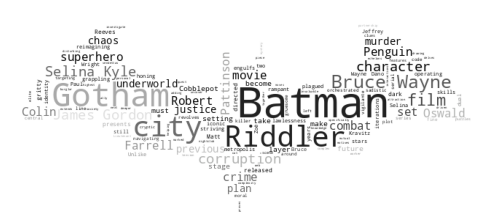

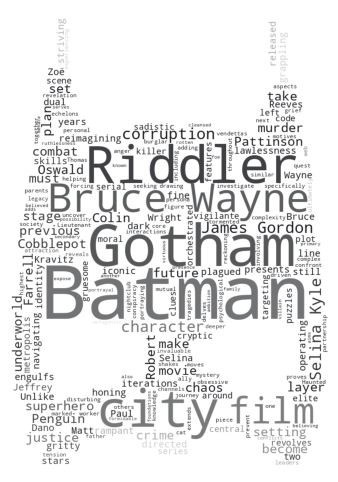

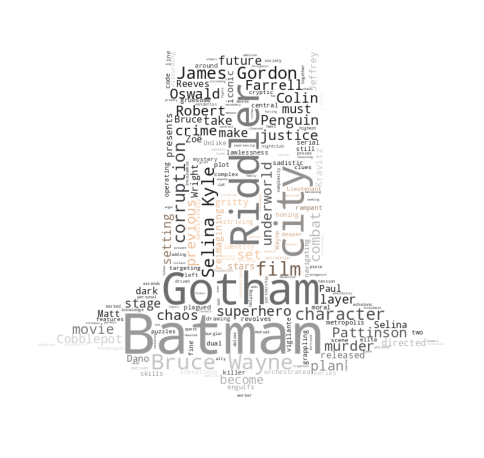

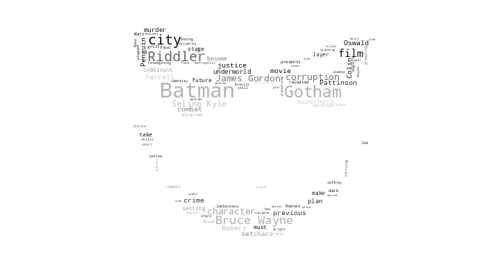

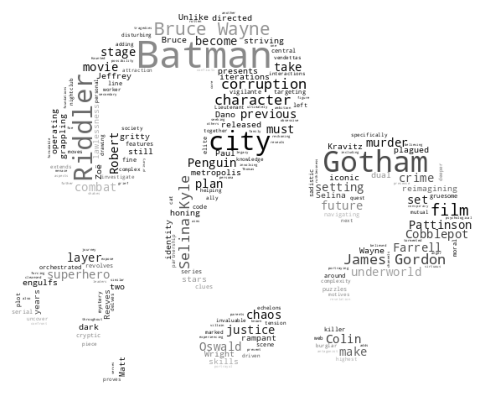

In [27]:
img_paths = os.listdir("../data/wordclouds")

for path in img_paths:
    path = os.path.join("..","data", "wordclouds", path)

    wordcloud = generate_wordcloud(path)

    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.show()

<hr><hr>